Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 445.7197
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 100.3230 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.7526 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96.3305  
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 127.3311 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33.9033 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.0690 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.8233  
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74.7574  
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.3120 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.9384 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.1394 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.6941 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.9451  
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36.0129

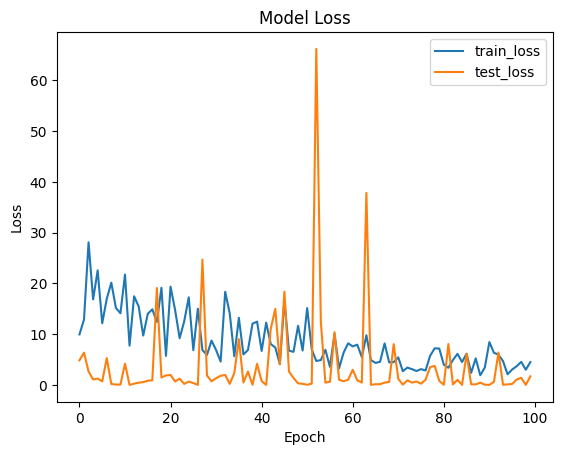

Average Prediction Accuracy: 0.8602628813070409


In [17]:

import numpy as np
import pandas as pd
from prettytable import PrettyTable
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

my_data = np.array([[320,0,0.50,100,0.40],
                    [320,20,0.50,100,0.63],
                    [320,40,0.50,100,0.99],
                    [320,80,0.50,100,1.41],
                    [320,0,1,100,0.57],
                    [320,20,1,100,0.95],
                    [320,40,1,100,1.24],
                    [320,60,1,100,1.43],
                    [320,75,1,100,1.55],
                    [320,80,1,100,1.57],
                    [320,0,2,100,0.60],
                    [320,20,2,100,0.96],
                    [320,40,2,100,1.16],
                    [320,60,2,100,1.27],
                    [320,75,2,100,1.33],
                    [320,80,2,100,1.35],
                    [320,0,3,100,0.56],
                    [320,20,3,100,0.85],
                    [320,40,3,100,0.89],
                    [320,80,3,100,1.06],
                    [320,0,5,100,0.48],
                    [320,20,5,100,0.63],
                    [320,40,5,100,0.63],
                    [320,80,5,100,0.69],
                    [280,80,1,100,0.56],
                    [320,80,1,100,1.57],
                    [340,80,1,100,1.63],
                    [360,80,1,100,1.55],
                    [400,80,1,100,1.28],
                    [280,80,1,200,0.31],
                    [300,80,1,200,0.77],
                    [320,80,1,200,1.16],
                    [340,80,1,200,1.36],
                    [360,80,1,200,1.39],
                    [380,80,1,200,1.30],
                    [400,80,1,200,1.12],
                    [280,80,1,250,0.27],
                    [320,80,1,250,1.02],
                    [340,80,1,250,1.21],
                    [360,80,1,250,1.25],
                    [400,80,1,250,1.06],
                    [280,80,1,50,1.22],
                    [320,80,1,50,1.89],
                    [340,80,1,50,1.75],
                    [360,80,1,50,1.63],
                    [400,80,1,50,1.35]])

my_column_names = ['Temperature(C)','Pressure(psig)','H2 to N2 ratio','Flow rate(ml/g)','Ammonia Concentration(%)']
Ammonia_data = pd.DataFrame(data=my_data, columns=my_column_names)

# X represents first four columns as input feature and y represents the fifth column as target output
X = my_data[:, :4]
y = my_data[:, 4]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state = 4)

# define the deep neural network model
model = Sequential()
model.add(Dense(64, input_dim=4, activation='softplus'))
model.add(Dropout(0.01))
model.add(Dense(128, activation='softplus'))
model.add(Dropout(0.01))
model.add(Dense(64, activation='softplus'))
model.add(Dropout(0.01))
model.add(Dense(1, activation='linear'))

# compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error', optimizer=opt)

# train the model on the training set
model.fit(X_train, y_train, epochs=100, batch_size=10)
history_train = model.fit(X_train, y_train, epochs=100, batch_size=3)
history_test = model.fit(X_test, y_test, epochs=100, batch_size=3)

# evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse)

# use the trained model to make predictions on the testing set
y_pred = model.predict(X_test)


# print the actual and predicted values for ammonia concentration
table = PrettyTable(['Actual Ammonia Concentration(%)', 'Predicted Ammonia Concentration(%)'])
for i in range(len(y_test.flatten())):
    table.add_row([y_test.flatten()[i], y_pred.flatten()[i]])
print(table)

# plot the loss curve
plt.plot(history_train.history['loss'], label = 'train_loss')
plt.plot(history_test.history['loss'], label = 'test_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# Save the model for as h5 file
model.save('my_model_NN.h5')

# Calculate the average prediction accuracy
absolute_differences = np.abs(y_test - y_pred) / y_test
prediction_accuracy = 1 - absolute_differences
average_prediction_accuracy = np.mean(prediction_accuracy)
print(f"Average Prediction Accuracy: {average_prediction_accuracy}")

1/1 [==============================] - 0s 45ms/step


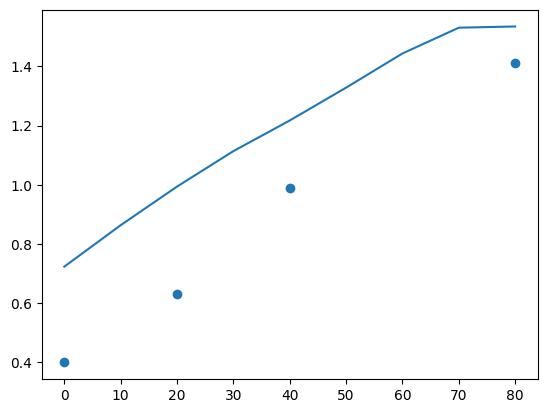

In [ ]:
Ratio_Exp = 0.5
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Temperature, Pressure, Ratio_Exp, Gas_flow_rate])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[1] for row in Combined_array]
ratio = [row[2] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred)
plt.scatter([0,20,40,80],[0.4,0.63,0.99,1.41])


1/1 [==============================] - 0s 248ms/step


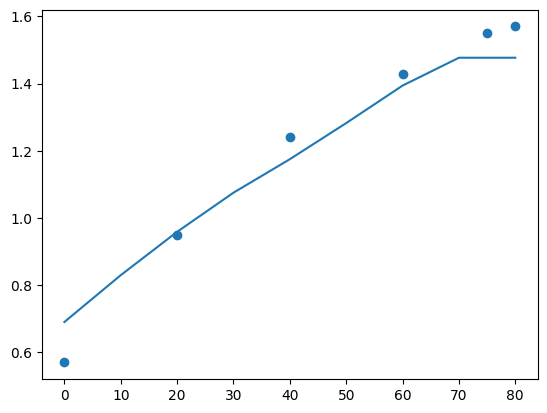

In [ ]:
Ratio_Exp = 1
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Temperature, Pressure, Ratio_Exp, Gas_flow_rate])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[1] for row in Combined_array]
ratio = [row[2] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred)
plt.scatter([0,20,40,60,75,80],[0.57,0.95,1.24,1.43,1.55,1.57])


1/1 [==============================] - 0s 50ms/step


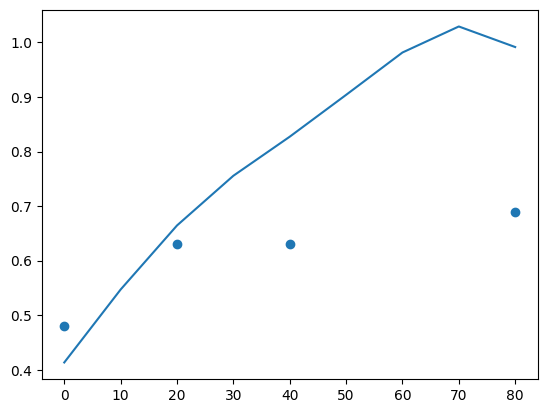

In [ ]:
Ratio_Exp = 5
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Temperature, Pressure, Ratio_Exp, Gas_flow_rate])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[1] for row in Combined_array]
ratio = [row[2] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred)
plt.scatter([0,20,40,80],[0.48,0.63,0.63,0.69])


1/1 [==============================] - 0s 79ms/step


Text(0, 0.5, 'NH3 concentration(%)')

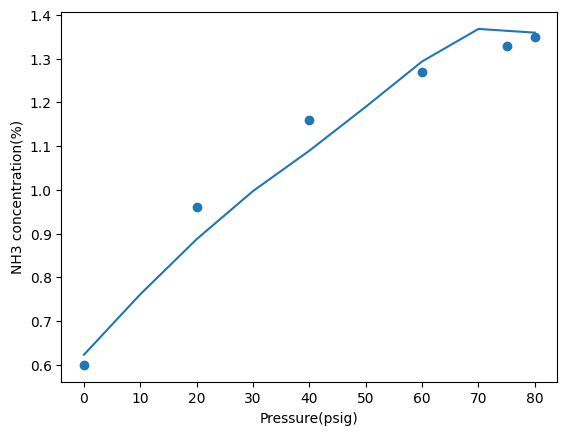

In [ ]:
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the Keras model
model = load_model('my_model_NN.h5')

Ratio_Exp = 2
Combined_array = []
Temperature = 320
Gas_flow_rate = 100

# pressure range with an increment of 10
Pressure_range = range(0, 81, 10)

for Pressure in Pressure_range:
    Combined_array.append([Temperature, Pressure, Ratio_Exp, Gas_flow_rate])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[1] for row in Combined_array]
ratio = [row[2] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred)
plt.scatter([0,20,40,60,75,80],[0.6,0.96,1.16,1.27,1.33,1.35])

plt.xlabel('Pressure(psig)')
plt.ylabel('NH3 concentration(%)')

1/1 [==============================] - 0s 37ms/step


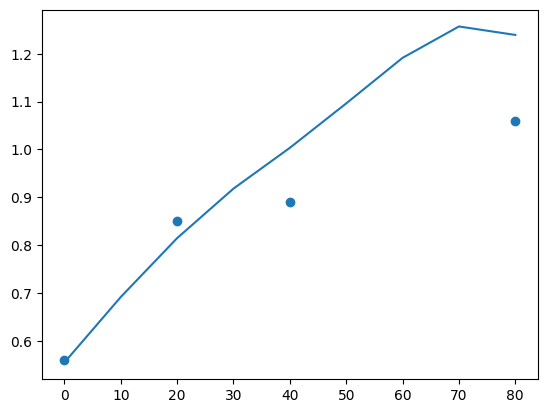

In [ ]:
Ratio_Exp = 3
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Temperature, Pressure, Ratio_Exp, Gas_flow_rate])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[1] for row in Combined_array]
ratio = [row[2] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred)
plt.scatter([0,20,40,80],[0.56,0.85,0.89,1.06])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
